# Assignment 2 - Classification

## Instructions

For the Second Assignment, we are going to be implementing the classification algorithms: Logistic Regression, Multinomial Naive Bayes and Random Forest.

1. Each task is associated with different set of classification mathods.
2. Each task will use its own dataset that is already written in the cell.
3. Each Task is presenting a challenge.

## Devashish Nalapareddy  1002162185

## Haripranay Peddagolla  1002168970

## Roja Bobbala           1002170073

## Task 2: NLP on  Email Data

Next up! This task involves applying NLP techniques on the data which consists of text from the news and their classification whether they are Fake news or Real News.

Simply run below cell to read and display the data

In [2]:
import pandas as pd

In [3]:
news_data = pd.read_csv("fake_or_real_news.csv")

news_data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

### Task 2A: 5 points

1. Map the 'label' variable to 1-Fake and 0-Real.
2. Display a pie chart for the distribution of two categories of news. 
3. The pie chart should have title, the name and percentage of each category and startangle equal to 90.
4. Use explode feature for Fake category.

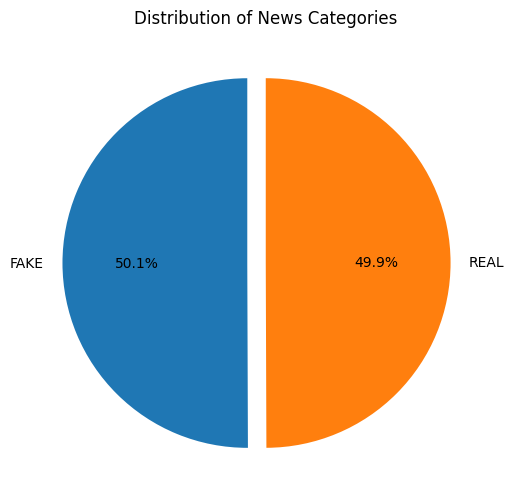

In [4]:
import matplotlib.pyplot as plt

# Calculate distribution of the two categories
distribution = news_data['label'].value_counts(normalize=True)

# Generate labels and values for pie chart
labels = 'FAKE', 'REAL'
sizes = distribution.values
explode = (0.1, 0)  # explode the Fake News slice

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of News Categories')
plt.show()

The left half, shown in blue, represents the "FAKE" news category, constituting a slight majority with 50.1% of the total news items in the dataset.


The right half, in orange, shows the "REAL" news category, making up just a fraction less, at 49.9%.


Interpretation:


Balanced Dataset: The dataset appears to be very well-balanced between the two classes, which is ideal for machine learning purposes because it means that the classifier won't be biased toward one class due to uneven class distribution.


Model Training: When training a model on this dataset, the accuracy metric could be a reliable indicator of performance because each class has an almost equal representation in the data.

### Task 2B: 10 points
Now its time to clean the text to keep as many as useful words for further processing.

1. Remove special caharacters from the text.
2. Remove stop words.
3. Lemmatize the words.
4. Keep only text that is alphabet and the length of the word is greater than 2.

Note: Remember to lower the text before applying these cleaning techniques.

In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Make sure to download these once before running the script
nltk.download('stopwords')
nltk.download('wordnet')


# Define the text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Split into words
    words = text.split()
    # Remove stop words and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha() and len(word) > 2]
    # Join back into string
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

# Apply the cleaning function to the text column
news_data['cleaned_text'] = news_data['text'].apply(clean_text)

# Save the cleaned dataset to a new CSV file
news_data.to_csv("D:\Data Mining spring 2024\Assignment 2\Batch2/cleaned_fake_or_real_news.csv", index=False)

# Display the first few rows of the cleaned text to verify
print(news_data[['text', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  Daniel Greenfield, a Shillman Journalism Fello...   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...   
2  U.S. Secretary of State John F. Kerry said Mon...   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...   
4  It's primary day in New York and front-runners...   

                                        cleaned_text  
0  daniel greenfield shillman journalism fellow f...  
1  google pinterest digg linkedin reddit stumbleu...  
2  secretary state john kerry said monday stop pa...  
3  kaydee king kaydeeking november lesson tonight...  
4  primary day new york front runner hillary clin...  


In [6]:
news_data['label'] = news_data['label'].map({'FAKE': 1, 'REAL': 0})


In [7]:
news_data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text  label  \
0  Daniel Greenfield, a Shillman Journalism Fello...      1   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      1   
2  U.S. Secretary of State John F. Kerry said Mon...      0   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      1   
4  It's primary day in New York and front-runners...      0   

                                        cleaned_text  
0  daniel greenfield shillman journalism fellow f...  
1  google pinterest digg linkedin reddit stumbleu...  
2  secretary state john kerry said monday stop pa...  
3  kaydee king kaydeeking november lesson tonight...  
4  primary day new york front runner hillary clin...

we can see the cleaned text 

### Task 2C: 5 points

1. Split the data into training/testing with 80-20 ration and stratify
2. Also define startified kfold with 3 splits.

In [8]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# 'label' as the target variable
# And 'cleaned_text' as the feature for simplicity
# Replacing 'cleaned_text' with our actual feature 

# Splitting the data into training and testing sets with an 80-20 ratio and stratification
X_train, X_test, y_train, y_test = train_test_split(news_data['cleaned_text'], news_data['label'], test_size=0.2, stratify=news_data['label'], random_state=42)

# Defining Stratified KFold with 3 splits
strat_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# At this point:
# X_train, X_test hold the features for training and testing sets.
# y_train, y_test hold the labels for training and testing sets.
# strat_kfold can be used for cross-validation with 3 stratified folds.


### Task 2D: 5 points

1. Use Bag of words technique with bigrams and apply to trainign and testing data.
2. Use TF-IDF technique with bigrams and apply to training and testing data.

TIP: Remember to store the modified data into different variables.
Note: Remember to only transform the testing data.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with bigrams
count_vect = CountVectorizer(ngram_range=(1, 2))

# Fit the vectorizer on the training data and transform the training data
X_train_bow = count_vect.fit_transform(X_train)

# Transforming the testing data
X_test_bow = count_vect.transform(X_test)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer with bigrams
tfidf_vect = TfidfVectorizer(ngram_range=(1, 2))

# Fit the vectorizer on the training data and transform the training data
X_train_tfidf = tfidf_vect.fit_transform(X_train)

# Transform the testing data 
X_test_tfidf = tfidf_vect.transform(X_test)


### Task 2E: 10 points
Now comes the main part where we will be applying machine learning algorithms on the cleaned, transformed data. 

1. Apply Multinomial Naive Bayes and Logistic Regression for both bag of words and TF-IDF transformed data.
2. Use Accuracy and F1 evaluation metric
3. Display the scores in a tabular format.
4. Perform hyper-parameter tuning for each algorithm with grid search and use the best estimated model from each type to test the data further and print the accuracy score.
5. Display the confusion matrix.

Note: Look at the F1 score while selecting the bag of words and TFIDF technique for each algorithm.

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report



1.

    Multinomial Naive Bayes with Bag of Words(BOW),
    Multinomial Naive Bayes with Bag of Words(TF-IDF) 
    Accuracy and F1 evaluation metric

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

# Initialize two Multinomial Naive Bayes models
# One model for the Bag of Words (BoW) vectorized data
# Another for the Term Frequency-Inverse Document Frequency (TF-IDF) vectorized data
# This differentiation allows us to compare the effectiveness of each text representation method.
nb_model_bow = MultinomialNB()
nb_model_tfidf = MultinomialNB()

# Train the models on their respective datasets
# The BoW model captures word counts and ignores the context, making it simpler but fast and effective for certain datasets.
# The TF-IDF model accounts for word importance, which helps in focusing on more relevant terms in the documents.
nb_model_bow.fit(X_train_bow, y_train)
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
# These predictions allow us to evaluate how well each model can generalize from the training data to unseen data.
y_pred_bow_nb = nb_model_bow.predict(X_test_bow)
y_pred_tfidf_nb = nb_model_tfidf.predict(X_test_tfidf)

# Calculate and display evaluation metrics for each model
# Accuracy and F1 Score provide insights into the models' performance from different perspectives.
# Accuracy measures the overall correctness of the predictions.
# F1 Score is particularly useful in datasets with imbalanced classes, as it balances precision and recall.
accuracy_bow_nb = accuracy_score(y_test, y_pred_bow_nb)
accuracy_tfidf_nb = accuracy_score(y_test, y_pred_tfidf_nb)
f1_bow_nb = f1_score(y_test, y_pred_bow_nb)
f1_tfidf_nb = f1_score(y_test, y_pred_tfidf_nb)

# Displaying the results for both models helps us compare their effectiveness
# This comparison can guide decisions on text vectorization techniques for future modeling efforts.
print("Multinomial Naive Bayes (BoW) - Accuracy:", accuracy_bow_nb, "F1 Score:", f1_bow_nb)
print("Multinomial Naive Bayes (TF-IDF) - Accuracy:", accuracy_tfidf_nb, "F1 Score:", f1_tfidf_nb)



Multinomial Naive Bayes (BoW) - Accuracy: 0.8847671665351223 F1 Score: 0.8723776223776224
Multinomial Naive Bayes (TF-IDF) - Accuracy: 0.7924230465666929 F1 Score: 0.7398615232443126


2.

Logistic Regression (BOW)

Logistic Regression (TF-IDF) 

 Accuracy and F1 evaluation metric

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model for BoW data
# Logistic Regression is chosen due to its ability to provide a probabilistic framework
# and interpretability in terms of feature importance for text classification tasks.
model_lr_bow = LogisticRegression(max_iter=1000)
# Train the model on the training dataset transformed with Bag of Words (BoW)
# BoW is a simple yet effective representation that counts the number of times each word appears in a document.
# It disregards the order of words but captures the essence of document content.
model_lr_bow.fit(X_train_bow, y_train)

# Initialize the Logistic Regression model for TF-IDF data
# Here, the same Logistic Regression algorithm is applied but this time with TF-IDF transformed data,
# allowing us to compare the impact of different feature extraction techniques on model performance.
model_lr_tfidf = LogisticRegression(max_iter=1000)
# Train the model on the training dataset transformed with TF-IDF
# TF-IDF accounts for both the frequency of words and their importance across documents,
# potentially offering better performance by highlighting significant words.
model_lr_tfidf.fit(X_train_tfidf, y_train)



LogisticRegression(max_iter=1000)

In [16]:
from sklearn.metrics import accuracy_score, f1_score

# Making predictions on the test set using the BoW model
# The model previously trained on BoW data is now used to predict the labels of the test dataset,
# allowing us to evaluate how well the model has learned from the training data.
y_pred_bow = model_lr_bow.predict(X_test_bow)

# Calculating accuracy for the BoW model
# Accuracy measures the proportion of correct predictions made by the model,
# providing a straightforward metric for evaluating model performance.
accuracy_bow = accuracy_score(y_test, y_pred_bow)

# Calculating the F1 score for the BoW model
# The F1 score is a harmonic mean of precision and recall, offering a balance
# between the importance of correctly identifying positive cases and the cost of false positives.
# This metric is especially useful in scenarios where there is an imbalance in the dataset.
f1_bow = f1_score(y_test, y_pred_bow)

# Making predictions on the test set using the TF-IDF model
# Similarly, the model trained on TF-IDF data predicts the labels for the test set,
# helping us understand the impact of considering term frequency and document frequency
# on the model's ability to classify text accurately.
y_pred_tfidf = model_lr_tfidf.predict(X_test_tfidf)

# Calculating accuracy for the TF-IDF model
# A comparison of accuracy between the BoW and TF-IDF models can provide insights
# into which feature representation better captures the nuances necessary for accurate classification.
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

# Calculating the F1 score for the TF-IDF model
# Evaluating the F1 score for the TF-IDF model allows for a direct comparison of model performance
# on a metric that considers both the precision and recall, beyond simple accuracy.
f1_tfidf = f1_score(y_test, y_pred_tfidf)

# Outputting the evaluation metrics
# These print statements provide a clear, concise summary of the model performances,
# facilitating an understanding of the strengths and weaknesses of each feature extraction method
# (BoW vs. TF-IDF) when used in conjunction with Logistic Regression for text classification.
print(f"BoW Model - Accuracy: {accuracy_bow:.4f}, F1 Score: {f1_bow:.4f}")
print(f"TF-IDF Model - Accuracy: {accuracy_tfidf:.4f}, F1 Score: {f1_tfidf:.4f}")



BoW Model - Accuracy: 0.9203, F1 Score: 0.9213
TF-IDF Model - Accuracy: 0.9155, F1 Score: 0.9159


3. Table format

In [17]:
import pandas as pd

# Prepare the data
Table = {
    'Model': [
        'Multinomial Naive Bayes (BoW)',
        'Multinomial Naive Bayes (TF-IDF)',
        'Logistic Regression (BoW)',
        'Logistic Regression (TF-IDF)'
    ],
    'Accuracy': [
       accuracy_bow_nb,  # MNB BoW
       accuracy_tfidf_nb,  # MNB TF-IDF
       accuracy_bow,              # LR BoW
       accuracy_tfidf               # LR TF-IDF
    ],
    'F1 Score': [
        f1_bow_nb,  # MNB BoW
        f1_tfidf_nb,  # MNB TF-IDF
        f1_bow,              # LR BoW
        f1_tfidf               # LR TF-IDF
    ]
}

# Create a DataFrame
scores_df = pd.DataFrame(Table)

# Display the DataFrame
scores_df


Model  Accuracy  F1 Score
0     Multinomial Naive Bayes (BoW)  0.884767  0.872378
1  Multinomial Naive Bayes (TF-IDF)  0.792423  0.739862
2         Logistic Regression (BoW)  0.920284  0.921278
3      Logistic Regression (TF-IDF)  0.915549  0.915947

4. Perform hyper-parameter tuning for each algorithm with grid search and use the best estimated model from each type to test the data further and print the accuracy score.

In [18]:
# Define the parameter grid for Multinomial Naive Bayes
# 'alpha' represents the smoothing parameter:
# - Smaller values of 'alpha' provide less smoothing (more weight to the observed counts).
# - Larger values of 'alpha' increase smoothing, reducing the weight of observed counts relative to the smoothing factor.
# This grid of 'alpha' values will be used in grid search to find the optimal parameter
# for the Multinomial Naive Bayes model, balancing between overfitting and underfitting.
param_grid_nb = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}


In [19]:
# Define the parameter grid for Logistic Regression
# 'C' represents the inverse of regularization strength; smaller values specify stronger regularization.
# A range of 'C' values is provided to explore the effect of different regularization strengths on model performance.
# 'solver' specifies the algorithm to use in the optimization problem, with 'liblinear' and 'saga'
# being options suited for different types of data and convergence criteria.
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


In [20]:
# Assuming X_train and y_train are your training data and labels, respectively
from sklearn.metrics import accuracy_score, f1_score,make_scorer
# Grid search for Multinomial Naive Bayes
scoring= { 'Accuracy':make_scorer(accuracy_score),'F1':'f1'}
grid_search_nb_bow = GridSearchCV(MultinomialNB(), param_grid_nb, scoring=scoring , refit='F1',return_train_score=True, cv=5)
grid_search_nb_bow.fit(X_train_bow, y_train)


 

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, refit='F1',
             return_train_score=True,
             scoring={'Accuracy': make_scorer(accuracy_score), 'F1': 'f1'})

In [21]:
from sklearn.metrics import accuracy_score, f1_score,make_scorer
# Grid search for Multinomial Naive Bayes
scoring= { 'Accuracy':make_scorer(accuracy_score),'F1':'f1'}
grid_search_nb_tfidf = GridSearchCV(MultinomialNB(), param_grid_nb, scoring=scoring , refit='F1',return_train_score=True, cv=5)
grid_search_nb_tfidf.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, refit='F1',
             return_train_score=True,
             scoring={'Accuracy': make_scorer(accuracy_score), 'F1': 'f1'})

In [22]:
# Adjust the param_grid to work with the pipeline
param_grid_lr = {
    'C': [0.1, 1.0, 10.0]
}


In [23]:
from sklearn.model_selection import GridSearchCV

# Setup GridSearchCV
grid_search_lr_tfidf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr_tfidf.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1.0, 10.0]}, scoring='accuracy')

In [29]:
# Setup GridSearchCV
grid_search_lr_bow = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr_bow.fit(X_train_bow, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1.0, 10.0]}, scoring='accuracy')

In [31]:

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Utilizing the best estimator for Multinomial Naive Bayes after performing grid search with Bag of Words
# This estimator has been fine-tuned for hyperparameter 'alpha' which controls model complexity.
best_nb_bow = grid_search_nb_bow.best_estimator_

# Prediction phase using the optimized Naive Bayes model on the test set
# Bag of Words method used here simplifies text data into a 'bag' of words, ignoring syntax but focusing on occurrence.
y_pred_nb_bow = best_nb_bow.predict(X_test_bow)

# Evaluation metrics for Naive Bayes with BoW, providing quantitative measures of model performance
# Accuracy measures the proportion of correct predictions, while F1 Score provides a balance between precision and recall.
accuracy_nb_bow = accuracy_score(y_test, y_pred_nb_bow)
f1_nb_bow = f1_score(y_test, y_pred_nb_bow)
print("MNB with BoW - Accuracy:", accuracy_nb_bow)
print("MNB with BoW - F1 Score:", f1_nb_bow)

# Repeating the process for Naive Bayes with TF-IDF, another text representation technique
# TF-IDF increases the weight of unique words which could provide more insight into the document's content.
best_nb_tfidf = grid_search_nb_tfidf.best_estimator_
y_pred_nb_tfidf = best_nb_tfidf.predict(X_test_tfidf)
accuracy_nb_tfidf = accuracy_score(y_test, y_pred_nb_tfidf)
f1_nb_tfidf = f1_score(y_test, y_pred_nb_tfidf)
print("MNB with TF-IDF - Accuracy:", accuracy_nb_tfidf)
print("MNB with TF-IDF - F1 Score:", f1_nb_tfidf)

##########################################################

# Employing the best Logistic Regression model trained with BoW
# Logistic Regression was chosen for its efficiency and effectiveness in binary classification tasks.
best_lr_bow = grid_search_lr_bow.best_estimator_
y_pred_lr_bow = best_lr_bow.predict(X_test_bow)
accuracy_lr_bow = accuracy_score(y_test, y_pred_lr_bow)
f1_lr_bow = f1_score(y_test, y_pred_lr_bow)
print("LR with BoW - Accuracy:", accuracy_lr_bow)
print("LR with BoW - F1 Score:", f1_lr_bow)

# Applying the same evaluation process for Logistic Regression with TF-IDF
# This combination often yields strong performance due to its consideration of word importance.
best_lr_tfidf = grid_search_lr_tfidf.best_estimator_
y_pred_lr_tfidf = best_lr_tfidf.predict(X_test_tfidf)
accuracy_lr_tfidf = accuracy_score(y_test, y_pred_lr_tfidf)
f1_lr_tfidf = f1_score(y_test, y_pred_lr_tfidf)
print("LR with TF-IDF - Accuracy:", accuracy_lr_tfidf)
print("LR with TF-IDF - F1 Score:", f1_lr_tfidf)

# Printing out confusion matrices to understand the true positive, false positive, true negative, and false negative rates
# Confusion matrices provide detailed insight into model performance across different classes.
print("\nConfusion Matrix -MNB with Bag of Words:")
print(confusion_matrix(y_test, y_pred_nb_bow))
print("\nConfusion Matrix - MNB with TF-IDF:")
print(confusion_matrix(y_test, y_pred_nb_tfidf))
print("\nConfusion Matrix - LR with Bag of Words:")
print(confusion_matrix(y_test, y_pred_lr_bow))
print("\nConfusion Matrix - LR with TF-IDF:")
print(confusion_matrix(y_test, y_pred_lr_tfidf))


MNB with BoW - Accuracy: 0.9108129439621152
MNB with BoW - F1 Score: 0.9049621530698065
MNB with TF-IDF - Accuracy: 0.9123914759273876
MNB with TF-IDF - F1 Score: 0.9069572506286673
LR with BoW - Accuracy: 0.920284135753749
LR with BoW - F1 Score: 0.9216446858029481
LR with TF-IDF - Accuracy: 0.9321231254932912
LR with TF-IDF - F1 Score: 0.9317460317460317

Confusion Matrix -MNB with Bag of Words:
[[616  18]
 [ 95 538]]

Confusion Matrix - MNB with TF-IDF:
[[615  19]
 [ 92 541]]

Confusion Matrix - LR with Bag of Words:
[[572  62]
 [ 39 594]]

Confusion Matrix - LR with TF-IDF:
[[594  40]
 [ 46 587]]


### Task 2F: 5 points
1. Display a bar chart for the accuracy scores for each model.
2. Display the percentages on the bar.
3. Apply opacity on the bars according to the scores(1 being highest).
4. Display proper title and axes names.
5. IMP: Interpret your results and conclusion.

Note: Adjust ylims to clearly see the difference.

(0.9, 0.94)

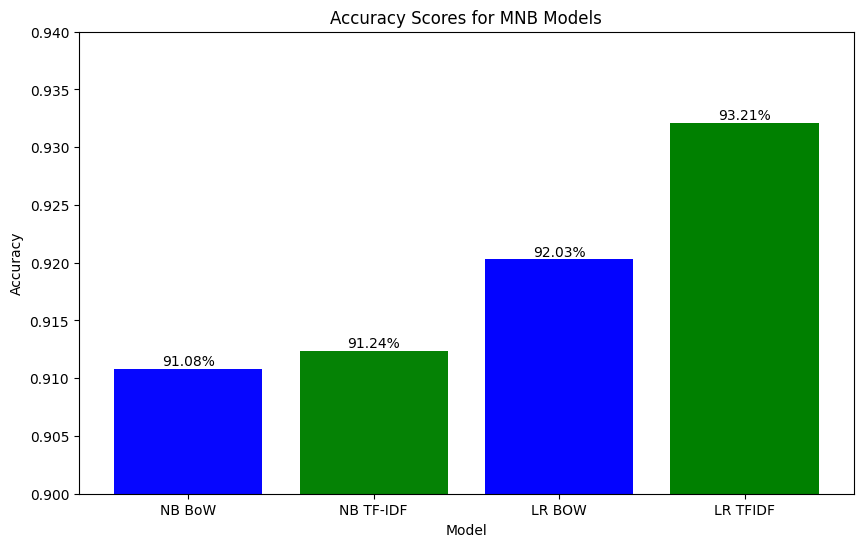

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
model_names = ['NB BoW',
               'NB TF-IDF',
               'LR BOW',
               'LR TFIDF',
               ]
accuracies = [accuracy_nb_bow,
              accuracy_nb_tfidf,
              accuracy_lr_bow,
              accuracy_lr_tfidf]

# Normalize the scores for opacity (1 being the highest score)
max_accuracy = max(accuracies)
opacity_acc = [score / max_accuracy for score in accuracies]

# Plotting Accuracy Scores
plt.figure(figsize=(10, 6))
bars_acc = plt.bar(model_names, accuracies, color=['blue', 'green'])
# Adjust opacity individually
for bar, alpha in zip(bars_acc, opacity_acc):
    bar.set_alpha(alpha)

# Adding accuracy percentages on the bars
for bar, score in zip(bars_acc, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), f'{score:.2%}', ha='center', va='bottom')

plt.title('Accuracy Scores for MNB Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 0.94)

NB BoW: The first bar represents the accuracy of the Multinomial Naive Bayes model using Bag of Words. It shows an accuracy of approximately 91.08%.


NB TF-IDF: The second bar, in green, shows the Multinomial Naive Bayes model using TF-IDF with a slightly higher accuracy of around 91.24%.


LR BoW: The third bar represents the Logistic Regression model using Bag of Words. The accuracy jumps to approximately 92.03%, indicating a performance improvement over the Naive Bayes model with the same text representation.


LR TF-IDF: The fourth bar, which is also green and the tallest, shows the Logistic Regression model using TF-IDF. This model has the highest accuracy of all, at about 93.21%.


Interpretation:


Model Performance: Logistic Regression models outperform Multinomial Naive Bayes models in terms of accuracy, regardless of the text vectorization technique used.


Vectorization Impact: For both models, TF-IDF slightly outperforms BoW, suggesting that the inclusion of inverse document frequency (the TF-IDF adjustment) provides a performance benefit. 


This could indicate that the weighting of terms in TF-IDF helps the models by reducing the noise and emphasizing important terms.


Optimal Model Selection: Based on this graph, the Logistic Regression model with TF-IDF is the best performer and might be the preferred model for deployment if accuracy is the primary concern.

Conclusions:


Algorithm Choice: When choosing an algorithm for text classification, Logistic Regression seems to be more accurate than Multinomial Naive Bayes for this particular dataset.

Feature Representation: The choice of feature representation is also crucial. While TF-IDF only slightly outperforms BoW, its consistent improvement across different models suggests it may be a more effective technique for this dataset.


Model Selection: For this dataset, if you had to select a model, Logistic Regression with TF-IDF would be recommended based on these results. However, further model tuning, error analysis, and considerations such as model interpretability and computational efficiency might also impact the final choice.

### Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code.
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

###  Submission details
Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

### NOTE: Only one team member will submit the file.